In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from math import sqrt, log
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

## Chargement des données

In [2]:
# Lecture des données

data=pd.read_csv('./Datatrain/test_requete_features.csv')
data=data.drop(['Unnamed: 0'],axis=1)

# Vérification du contenu
data.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,556,175,60,copenhagen,30,hungarian,0,6217,Boss Western,J.Halliday Inn,1,0,0
1,664,284,111,copenhagen,30,hungarian,0,6217,Accar Hotels,Safitel,0,1,0
2,96,124,37,copenhagen,30,hungarian,0,6217,Boss Western,Boss Western,0,0,0
3,865,277,107,copenhagen,30,hungarian,0,6217,Chillton Worldwide,Chill Garden Inn,1,1,0
4,58,203,65,copenhagen,30,hungarian,0,6217,Yin Yang,Royal Lotus,1,0,2


In [3]:
len(data)

151711

In [4]:
## Peut être enlever les variables comme hotel_id, avatar_id ? 

data.describe()

,hotel_id,price,stock,date,mobile,avatar_id,parking,pool,children_policy
count,151711.000000,151711.000000,151711.000000,151711.000000,151711.000000,151711.000000,151711.000000,151711.000000,151711.000000
mean,499.256184,156.162763,56.325303,24.203472,0.533501,51519.191819,0.437918,0.171655,0.066099
std,288.086216,78.785809,61.045505,14.202660,0.498878,27663.683197,0.496133,0.377082,0.304030
min,0.000000,38.000000,0.000000,2.000000,0.000000,6217.000000,0.000000,0.000000,0.000000
25%,250.000000,96.000000,6.000000,11.000000,0.000000,34260.000000,0.000000,0.000000,0.000000
50%,502.000000,140.000000,34.000000,29.000000,1.000000,34305.000000,0.000000,0.000000,0.000000
75%,748.000000,192.000000,92.000000,37.000000,1.000000,92219.000000,1.000000,0.000000,0.000000
max,998.000000,547.000000,284.000000,44.000000,1.000000,92222.000000,1.000000,1.000000,2.000000


## Analyse descriptive

### Distribution de la variable à prédire 'price'

Text(0.5, 1.0, 'Distribution of price after log transform')

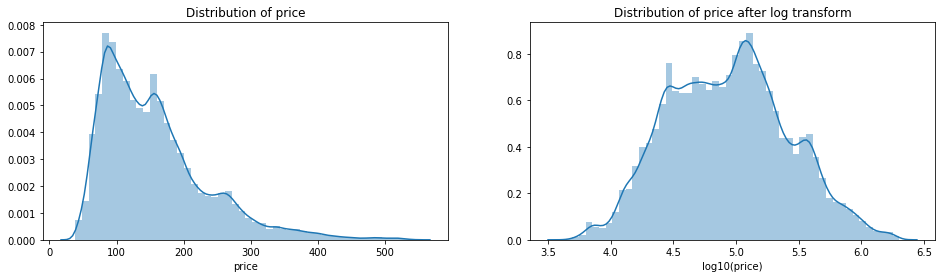

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
sns.distplot(data["price"], ax=ax1)
ax1.set_title('Distribution of price')

data["log_price"]=data["price"].map(lambda x : log(x))
sns.distplot(data["log_price"].rename('log10(price)'), ax=ax2)
ax2.set_title('Distribution of price after log transform')

### Distribution des variables quantitatives

Text(0.5, 1.0, 'Distribution of date')

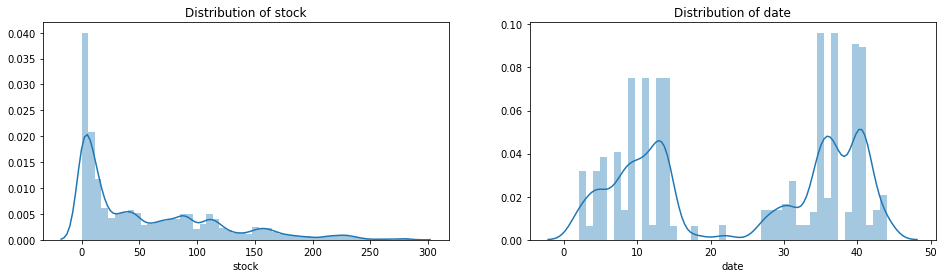

In [6]:
numerical=['stock','date']

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
sns.distplot(data["stock"], ax=ax1)
ax1.set_title('Distribution of stock')


## Date peut être pas pertinent ? 
sns.distplot(data["date"], ax=ax2)
ax2.set_title('Distribution of date')

In [7]:
data[numerical].corr()

,stock,date
stock,1.000000,0.783644
date,0.783644,1.000000


### Distribution variables qualitatives

In [8]:
list_parking=data["parking"].tolist()
list_parking2=[list_parking.count(0),list_parking.count(1)]

list_pool=data["pool"].tolist()
list_pool2=[list_pool.count(0),list_pool.count(1)]

list_children=data["children_policy"].tolist()
list_children2=[list_children.count(0),list_children.count(1),list_children.count(2)]

list_mobile=data["mobile"].tolist()
list_mobile2=[list_mobile.count(0),list_mobile.count(1)]


Text(0.5, 1.0, 'mobile')

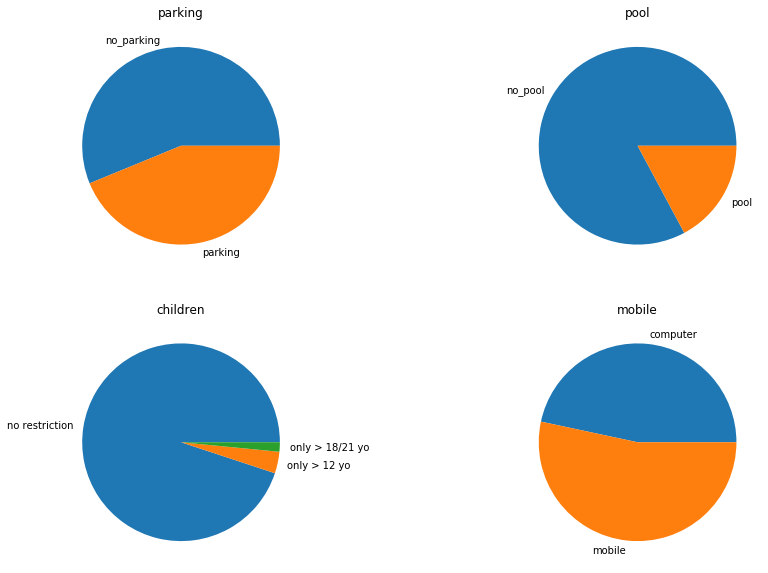

In [9]:
fig, axis = plt.subplots(2,2,figsize=(15,10))
axis[0,0].pie(list_parking2, labels = ['no_parking','parking'])
axis[0,0].set_title('parking')

axis[0,1].pie(list_pool2, labels = ['no_pool','pool'])
axis[0,1].set_title('pool')

axis[1,0].pie(list_children2, labels = ['no restriction','only > 12 yo','only > 18/21 yo' ])
axis[1,0].set_title('children')

axis[1,1].pie(list_mobile2, labels = ['computer','mobile'])
axis[1,1].set_title('mobile')

### Distribution du prix par rapport aux variables qualitatives

In [10]:
## Comprend pas pourquoi ça ne fonctionne pas de tous les afficher d'un coup ? 


# fig, axis = plt.subplots(2,2,figsize=(20,15))
# sns.boxplot(x=data["parking"], y=data["price"]).set(xlabel=None)
# axis[0,0].set_title('parking')

# sns.boxplot(x=data["pool"], y=data["price"]).set(xlabel=None)
# axis[0,1].set_title('pool')

# sns.boxplot(x=data["children_policy"], y=data["price"]).set(xlabel=None)
# axis[1,0].set_title('children')

# sns.boxplot(x=data["mobile"], y=data["price"]).set(xlabel=None)
# axis[1,1].set_title('mobile')

[Text(0.5, 0, '')]

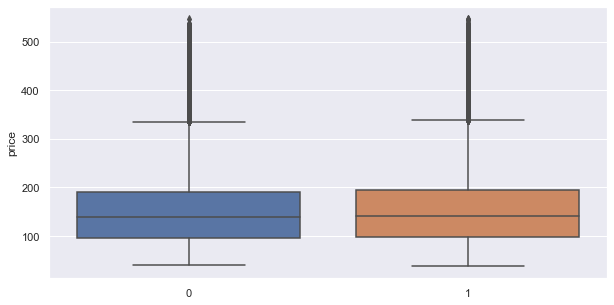

In [10]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["parking"], y=data["price"]).set(xlabel=None)

[Text(0.5, 0, '')]

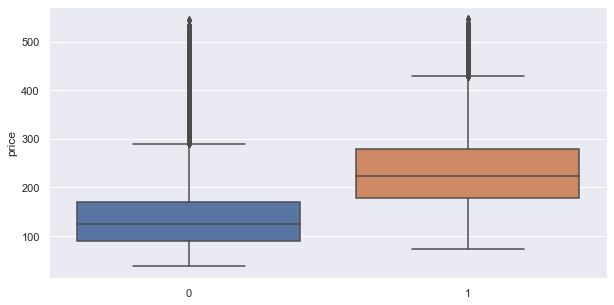

In [11]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["pool"], y=data["price"]).set(xlabel=None)

[Text(0.5, 0, '')]

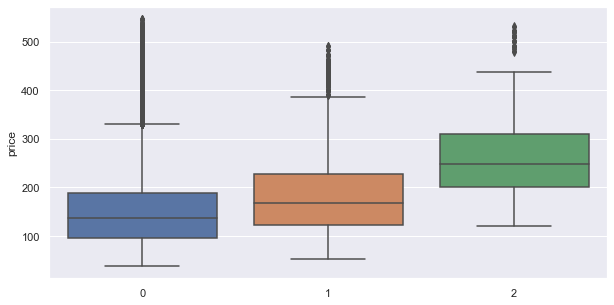

In [12]:
# Est-ce que l’hôtel a des restrictions concernant les enfants. 2 si l’hôtel interdit les enfants de moins de 18 ou 21 ans, 
# 1 si l’hôtel interdit les enfants de moins de 12 ans, 0 s’il autorise les enfants sans restrictions.

sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["children_policy"], y=data["price"]).set(xlabel=None)

[Text(0.5, 0, '')]

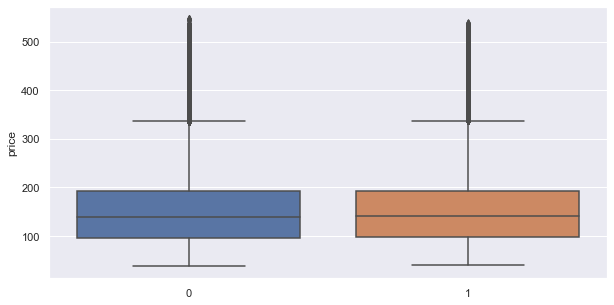

In [13]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["mobile"], y=data["price"]).set(xlabel=None)

## Modele

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV, LassoLarsCV
from itertools import cycle
from sklearn.linear_model import lasso_path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [15]:
data=data.drop(['log_price','avatar_id'],axis=1)

In [16]:
## equivalent méthode OneHotEncoding, a potentiellement modifier
## pour ne pas avoir de string 


data=pd.get_dummies(data, columns=['city', 'language', 'group', 'brand'])

In [17]:
data

,hotel_id,price,stock,date,mobile,parking,pool,children_policy,city_amsterdam,city_copenhagen,...,brand_Ibas,brand_Independant,brand_J.Halliday Inn,brand_Marcure,brand_Morriot,brand_Navatel,brand_Quadrupletree,brand_Royal Lotus,brand_Safitel,brand_Tripletree
0,556,175,60,30,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,664,284,111,30,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,96,124,37,30,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,865,277,107,30,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,58,203,65,30,0,1,0,2,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151706,654,227,6,9,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
151707,881,188,8,9,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
151708,221,59,1,9,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
151709,887,136,8,9,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [18]:
price=data['price']
X_train, X_test, Y_train, Y_test = train_test_split(data,price,test_size=0.25,random_state=11)
X_train=X_train.drop(['price'],axis=1)
X_test=X_test.drop(['price'],axis=1)

In [19]:
X_train.head()

,hotel_id,stock,date,mobile,parking,pool,children_policy,city_amsterdam,city_copenhagen,city_madrid,...,brand_Ibas,brand_Independant,brand_J.Halliday Inn,brand_Marcure,brand_Morriot,brand_Navatel,brand_Quadrupletree,brand_Royal Lotus,brand_Safitel,brand_Tripletree
115628,708,74,35,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115367,546,65,35,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
135345,623,213,40,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9938,976,24,31,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7869,861,112,36,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [21]:
# scaler = StandardScaler()  
# scaler.fit(X_train)  
# Xr_train = scaler.transform(X_train)  
# # Meme transformation sur le test
# Xr_test = scaler.transform(X_test)

## Decision tree

In [24]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
regtree= GridSearchCV(DecisionTreeRegressor(),param,cv=5,n_jobs=-1)
regtreeOpt=regtree.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (regtreeOpt.best_score_,regtreeOpt.best_params_))

Ypred_regtree = regtreeOpt.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regtree,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regtree))

Meilleur score = 0.855655, Meilleur paramètre = {'max_depth': 9}
MSE :  892.5337906016798
R2 :  0.8556111648524376


In [20]:
param=[{"max_features":list(range(2,10))}]
regrf= GridSearchCV(DecisionTreeRegressor(),param,cv=5,n_jobs=-1)
regrfOpt=regrf.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))

Ypred_regrf = regrfOpt.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regrf,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regrf))


Meilleur score = 0.958684, Meilleur paramètre = {'max_features': 9}
MSE :  264.1758353547072
R2 :  0.9572631965952947


## Random Forest

In [29]:
param=[{"max_features":list(range(2,10))}]
regrf= GridSearchCV(RandomForestRegressor(),param,cv=5,n_jobs=-1)
regrfOpt=regrf.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))

Ypred_regrf = regrfOpt.predict(X_test)


print("MSE : ",mean_squared_error(Ypred_regrf,Y_test))
print("RMSE : ", sqrt(mean_squared_error(Ypred_regrf,Y_test)))
print("R2 : ",r2_score(Y_test,Ypred_regrf))

Meilleur score = 0.983587, Meilleur paramètre = {'max_features': 9}
MSE :  93.39528880221674
RMSE :  9.664123798990612
R2 :  0.9848910628365884


## Gradient Boosting

In [25]:
param=[{"max_depth":[1,2,3], "learning_rate":[0.1,0.5,1.0]}]
reggradboost = GridSearchCV(GradientBoostingRegressor(n_estimators=100), param, cv=10,n_jobs=-1)

reggradboost_Opt=reggradboost.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (reggradboost_Opt.best_score_,reggradboost_Opt.best_params_))

Ypred_gbreg = reggradboost_Opt.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_gbreg,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_gbreg))


## Regression Linéaire

#### Sans pénalisation

In [24]:
reg_lin = linear_model.LinearRegression()

reglin = reg_lin.fit(X_train,Y_train)
Ypred_reglin = reglin.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_reglin,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_reglin))

MSE :  634.369499244183
R2 :  0.8932625031119216


#### Avec pénalisation Lasso

In [25]:
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Ypred_regLasso=regLassOpt.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regLasso,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regLasso))

Meilleur R2 = 0.892210, Meilleur paramètre = {'alpha': 0.05}
MSE :  637.7878099281975
R2 :  0.8926873463201271


In [ ]:
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
regCoef=regLasso.fit(X_train,Y_train).coef_
print(regCoef)

In [ ]:
coef = pd.Series(regCoef, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

In [ ]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

In [ ]:
model = LassoCV(cv=5, alphas=np.array(range(1,50,1))/20.,n_jobs=-1,random_state=13).fit(X_train,Y_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
# ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()

## SVM

#### SVM Noyau linéaire

In [ ]:
param=[{"C":[0.01,0.03,0.05,0.1,0.2,0.3,0.5,1,1.2,1.5,1.7,2,3,4]}]
regsvm_l = GridSearchCV(SVR(kernel="linear"), param, cv=5, n_jobs=-1)  # try kernel="rbf" instead

regsvmOpt_l=regsvm_l.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (regsvmOpt_l.best_score_,regsvmOpt_l.best_params_))

Ypred_regsvml = regsvmOpt_l.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regsvml,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regsvml))



#### SVM Noyau gaussien

In [ ]:
param=[{"C":[0.01,0.03,0.05,0.1,0.2,0.3,0.5,1,1.2,1.5,1.7,2,3,4],"gamma":[0.01,0.02,0.05,0.07,0.1,0.15,0.2]}]
regsvm_g = GridSearchCV(SVR(kernel="rbf"), param, cv=5, n_jobs=-1)  

regsvmOpt_g=regsvm_g.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (regsvmOpt_g.best_score_,regsvmOpt_g.best_params_))

Ypred_regsvmg = regsvmOpt_g.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regsvmg,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regsvmg))


#### SVM Noyau polynomial

In [ ]:
param=[{"C":[0.01,0.03,0.05,0.1,0.2,0.3,0.5,1,1.2,1.5,1.7,2,3,4],"gamma":[0.01,0.02,0.05,0.07,0.1,0.15,0.2]}]
regsvm_p = GridSearchCV(SVR(kernel="rbf"), param, cv=5, n_jobs=-1)  

regsvmOpt_p=regsvm_p.fit(X_train, Y_train)

print("Meilleur score = %f, Meilleur paramètre = %s" % (regsvmOpt_p.best_score_,regsvmOpt_p.best_params_))

Ypred_regsvmp = regsvmOpt_p.predict(X_test)

print("MSE : ",mean_squared_error(Ypred_regsvmp,Y_test))
print("R2 : ",r2_score(Y_test,Ypred_regsvmp))

## Submission

In [214]:
data_train=pd.read_csv('./Datatrain/test_requete_features.csv')
data_train=data_train.drop(['Unnamed: 0'],axis=1)

In [215]:
data_train.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,556,175,60,copenhagen,30,hungarian,0,6217,Boss Western,J.Halliday Inn,1,0,0
1,664,284,111,copenhagen,30,hungarian,0,6217,Accar Hotels,Safitel,0,1,0
2,96,124,37,copenhagen,30,hungarian,0,6217,Boss Western,Boss Western,0,0,0
3,865,277,107,copenhagen,30,hungarian,0,6217,Chillton Worldwide,Chill Garden Inn,1,1,0
4,58,203,65,copenhagen,30,hungarian,0,6217,Yin Yang,Royal Lotus,1,0,2


In [216]:
data_test= pd.read_csv('test_set.csv')

In [217]:
data_test

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock
0,0,1,vilnius,21,romanian,0,1,161,46
1,1,1,vilnius,21,romanian,0,1,187,32
2,2,1,vilnius,21,romanian,0,1,279,12
3,3,1,vilnius,21,romanian,0,1,395,10
4,4,1,vilnius,21,romanian,0,1,488,42
...,...,...,...,...,...,...,...,...,...
6639,6639,843,rome,5,irish,0,794,987,1
6640,6640,844,vienna,1,irish,1,794,26,1
6641,6641,844,vienna,1,irish,1,794,263,0
6642,6642,844,vienna,1,irish,1,794,456,0


In [218]:
hotels = pd.read_csv('features_hotels.csv', index_col=['hotel_id', 'city'])
data_test = data_test.join(hotels, on=['hotel_id', 'city'])
data_test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy
0,0,1,vilnius,21,romanian,0,1,161,46,Boss Western,J.Halliday Inn,1,0,0
1,1,1,vilnius,21,romanian,0,1,187,32,Accar Hotels,Marcure,1,1,0
2,2,1,vilnius,21,romanian,0,1,279,12,Independant,Independant,1,0,0
3,3,1,vilnius,21,romanian,0,1,395,10,Accar Hotels,Ibas,0,0,0
4,4,1,vilnius,21,romanian,0,1,488,42,Accar Hotels,Safitel,1,1,1


In [219]:
data_train=pd.get_dummies(data_train, columns=['city', 'language', 'group', 'brand'])

In [220]:
data_test=pd.get_dummies(data_test, columns=['city', 'language','group', 'brand'])

In [221]:
data_train

,hotel_id,price,stock,date,mobile,avatar_id,parking,pool,children_policy,city_amsterdam,...,brand_Ibas,brand_Independant,brand_J.Halliday Inn,brand_Marcure,brand_Morriot,brand_Navatel,brand_Quadrupletree,brand_Royal Lotus,brand_Safitel,brand_Tripletree
0,556,175,60,30,0,6217,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,664,284,111,30,0,6217,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,96,124,37,30,0,6217,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,865,277,107,30,0,6217,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,58,203,65,30,0,6217,1,0,2,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151706,654,227,6,9,1,92222,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
151707,881,188,8,9,1,92222,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
151708,221,59,1,9,1,92222,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
151709,887,136,8,9,1,92222,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [222]:
data_test

,index,order_requests,date,mobile,avatar_id,hotel_id,stock,parking,pool,children_policy,...,brand_Ibas,brand_Independant,brand_J.Halliday Inn,brand_Marcure,brand_Morriot,brand_Navatel,brand_Quadrupletree,brand_Royal Lotus,brand_Safitel,brand_Tripletree
0,0,1,21,0,1,161,46,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,21,0,1,187,32,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,1,21,0,1,279,12,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,1,21,0,1,395,10,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,1,21,0,1,488,42,1,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,6639,843,5,0,794,987,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6640,6640,844,1,1,794,26,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6641,6641,844,1,1,794,263,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6642,6642,844,1,1,794,456,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [223]:
data_test_bis=data_test.drop(['index','order_requests'],axis=1)

In [224]:
data_test_bis

,date,mobile,avatar_id,hotel_id,stock,parking,pool,children_policy,city_amsterdam,city_copenhagen,...,brand_Ibas,brand_Independant,brand_J.Halliday Inn,brand_Marcure,brand_Morriot,brand_Navatel,brand_Quadrupletree,brand_Royal Lotus,brand_Safitel,brand_Tripletree
0,21,0,1,161,46,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,21,0,1,187,32,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,21,0,1,279,12,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,21,0,1,395,10,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,21,0,1,488,42,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,5,0,794,987,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6640,1,1,794,26,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6641,1,1,794,263,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6642,1,1,794,456,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
data_test_bis=data_test_bis.drop(['language_portuguese', 'language_romanian', 'language_slovakian', 'language_slovene', 'language_spanish', 'language_swedish'],axis=1)

In [226]:
data_test_bis=data_test_bis.drop(['avatar_id'],axis=1)

In [227]:
data_train=data_train.drop(['avatar_id'],axis=1)

In [228]:
data_test_bis

,date,mobile,hotel_id,stock,parking,pool,children_policy,city_amsterdam,city_copenhagen,city_madrid,...,brand_Ibas,brand_Independant,brand_J.Halliday Inn,brand_Marcure,brand_Morriot,brand_Navatel,brand_Quadrupletree,brand_Royal Lotus,brand_Safitel,brand_Tripletree
0,21,0,161,46,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,21,0,187,32,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,21,0,279,12,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,21,0,395,10,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,21,0,488,42,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,5,0,987,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6640,1,1,26,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6641,1,1,263,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6642,1,1,456,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
data_test_bis.index=data_test_bis['hotel_id']

In [230]:
data_test_bis=data_test_bis.drop(['hotel_id'],axis=1)

In [231]:
data_train.index=data_train['hotel_id']

In [232]:
data_train=data_train.drop(['hotel_id'],axis=1)

In [233]:
price=data_train['price']
X_train, X_test, Y_train, Y_test = train_test_split(data_train,price,test_size=0.25,random_state=11)
X_train=X_train.drop(['price'],axis=1)
X_test=X_test.drop(['price'],axis=1)

In [234]:
column_names_test = list(data_test_bis.columns.values)
column_names_train = list(X_train.columns.values)

In [235]:
print(column_names_test)
print("--------------------------------")
print(column_names_train)

['date', 'mobile', 'stock', 'parking', 'pool', 'children_policy', 'city_amsterdam', 'city_copenhagen', 'city_madrid', 'city_paris', 'city_rome', 'city_sofia', 'city_valletta', 'city_vienna', 'city_vilnius', 'language_austrian', 'language_belgian', 'language_bulgarian', 'language_croatian', 'language_cypriot', 'language_czech', 'language_danish', 'language_dutch', 'language_estonian', 'language_finnish', 'language_french', 'language_german', 'language_greek', 'language_hungarian', 'language_irish', 'language_italian', 'language_latvian', 'language_lithuanian', 'language_luxembourgish', 'language_maltese', 'language_polish', 'group_Accar Hotels', 'group_Boss Western', 'group_Chillton Worldwide', 'group_Independant', 'group_Morriott International', 'group_Yin Yang', 'brand_8 Premium', 'brand_Ardisson', 'brand_Boss Western', 'brand_Chill Garden Inn', 'brand_Corlton', 'brand_CourtYord', 'brand_Ibas', 'brand_Independant', 'brand_J.Halliday Inn', 'brand_Marcure', 'brand_Morriot', 'brand_Navat

In [236]:
param=[{"max_features":list(range(2,10))}]
regrf= GridSearchCV(RandomForestRegressor(),param,cv=5,n_jobs=-1)
regrfOpt=regrf.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))

Ypred_regrf = regrfOpt.predict(data_test_bis)



Meilleur score = 0.955653, Meilleur paramètre = {'max_features': 9}


In [238]:
submission=pd.DataFrame()
submission['index']=data_test['index']
submission['price']=Ypred_regrf

In [239]:
submission

,index,price
0,0,118.800000
1,1,196.700000
2,2,70.687500
3,3,62.600000
4,4,241.100000
...,...,...
6639,6639,76.806667
6640,6640,254.300000
6641,6641,190.325000
6642,6642,188.716667


In [240]:
submission.to_csv('submission.csv', index=False)